**Exercise 1**
**Analysis of client portfolio**

In [31]:
## Importing the necessary libraries for the analysis
import numpy as np # linear algebra
import pandas as pd # for converting to data frame
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns

In [32]:
## Loading the data set
df = pd.read_csv("Portfolio_for_test6.csv")
## First 5 rows
df.head()

,GROUPID,CLIENTID,GROUPNAME,MERCHANT_NAME,CLIENTNAME,MCC,ONLINEPOS,SCHEME,TRX_COUNT,TRX_AMOUNT,...,MSC,MSC_LTM,NET_MSC,NET_MSC_LTM,ATV,ID,REFUND_COUNT,REFUND_AMOUNT,REFUND_COUNT_LTM,REFUND_AMOUNT_LTM
0,Group_ID5926,Client_ID12902,Group5609,Merchant5106,Client11435,5977,POS,Visa,1836,36042.95,...,164.4513,17470.175720,10.820678,1094.684661,18.490762,1981952,0,0.0,0,0.0
1,Group_ID161,Client_ID1470,Group158,Merchant158,Client1383,8299,Online,Other_CC,0,0.00,...,0.0000,1.378428,0.000000,0.468398,27.500000,1967069,0,0.0,0,0.0
2,Group_ID2968,Client_ID9092,Group2833,Merchant2770,Client8125,5977,POS,Visa,0,0.00,...,0.0000,849.784410,0.000000,67.831466,29.847444,1980627,0,0.0,0,0.0
3,Group_ID4209,Client_ID10750,Group4058,Merchant3996,Client9631,5977,POS,MC,0,0.00,...,0.0000,14815.680340,0.000000,2191.874021,23.287567,1980627,0,0.0,0,0.0
4,Group_ID9084,Client_ID17183,Group8454,Merchant7915,Client15032,5921,Online,Visa,1,33.21,...,0.2760,5.282904,0.150012,3.206020,28.795000,1981204,0,0.0,0,0.0


In [33]:
# Check the shape of the dataset
df.shape # 1908 rows and 26 columns

(1908, 26)

In [34]:
## Data Understanding and Cleaning
# Check for missing values
df.isnull().sum() # 4 columns are empty so I will drop them

GROUPID                 0
CLIENTID                0
GROUPNAME               0
MERCHANT_NAME           0
CLIENTNAME              0
MCC                     0
ONLINEPOS               0
SCHEME                  0
TRX_COUNT               0
TRX_AMOUNT              0
TRX_COUNT_LTM           0
TRX_AMOUNT_LTM          0
CB_COUNT             1908
CB_AMOUNT            1908
FRAUD_COUNT          1908
FRAUD_AMOUNT         1908
MSC                     0
MSC_LTM                 0
NET_MSC                 0
NET_MSC_LTM             0
ATV                     0
ID                      0
REFUND_COUNT            0
REFUND_AMOUNT           0
REFUND_COUNT_LTM        0
REFUND_AMOUNT_LTM       0
dtype: int64

In [35]:
# Delete the 4 columns because they all have missing data
df.drop(['CB_COUNT', 'CB_AMOUNT', 'FRAUD_COUNT', 'FRAUD_AMOUNT'], axis=1, inplace=True)

In [36]:
df.isnull().sum() # no missing values

GROUPID              0
CLIENTID             0
GROUPNAME            0
MERCHANT_NAME        0
CLIENTNAME           0
MCC                  0
ONLINEPOS            0
SCHEME               0
TRX_COUNT            0
TRX_AMOUNT           0
TRX_COUNT_LTM        0
TRX_AMOUNT_LTM       0
MSC                  0
MSC_LTM              0
NET_MSC              0
NET_MSC_LTM          0
ATV                  0
ID                   0
REFUND_COUNT         0
REFUND_AMOUNT        0
REFUND_COUNT_LTM     0
REFUND_AMOUNT_LTM    0
dtype: int64

In [37]:
# Check data types of all columns
df.dtypes # 7 columns are categorical

GROUPID               object
CLIENTID              object
GROUPNAME             object
MERCHANT_NAME         object
CLIENTNAME            object
MCC                    int64
ONLINEPOS             object
SCHEME                object
TRX_COUNT              int64
TRX_AMOUNT           float64
TRX_COUNT_LTM          int64
TRX_AMOUNT_LTM       float64
MSC                  float64
MSC_LTM              float64
NET_MSC              float64
NET_MSC_LTM          float64
ATV                  float64
ID                     int64
REFUND_COUNT           int64
REFUND_AMOUNT        float64
REFUND_COUNT_LTM       int64
REFUND_AMOUNT_LTM    float64
dtype: object

In [38]:
# The first 5 columns contain categorical values that are not really relevant for the analysis, so I will drop them
df.drop(['GROUPID', 'CLIENTID', 'GROUPNAME', 'MERCHANT_NAME', 'CLIENTNAME'], axis=1, inplace=True)

In [39]:
# Since the ONLINEPOS is a categorical column that contains only 2 categories (binary), we can use One Hot Encoding, that will assign 1 for POS and 0 for Online
# Apply one hot encoding - we create a new column named ONLINEPOS_encoded
df['ONLINEPOS_encoded'] = df['ONLINEPOS'].apply(lambda x:1 if x=='POS' else 0)

In [40]:
# Delete the ONLINEPOS column
df.drop(['ONLINEPOS'], axis=1, inplace=True)
print(df)

       MCC    SCHEME  TRX_COUNT  TRX_AMOUNT  TRX_COUNT_LTM  TRX_AMOUNT_LTM  \
0     5977      Visa       1836    36042.95         201710    3.729770e+06   
1     8299  Other_CC          0        0.00             11    2.938509e+02   
2     5977      Visa          0        0.00           6187    1.846630e+05   
3     5977        MC          0        0.00         189870    4.421620e+06   
4     5921      Visa          1       33.21             21    6.153771e+02   
...    ...       ...        ...         ...            ...             ...   
1903  5977        MC          0        0.00         189657    4.446965e+06   
1904  5977      Visa          0        0.00          26361    8.928310e+05   
1905  5977      Visa          0        0.00          12331    3.397288e+05   
1906  5977  Other_CC          8      308.97          12940    3.882474e+05   
1907  5977        MC          0        0.00         183331    4.956380e+06   

             MSC       MSC_LTM    NET_MSC  NET_MSC_LTM        A

In [41]:
# View the SCHEME column
df['SCHEME'].values

array(['Visa', 'Other_CC', 'Visa', ..., 'Visa', 'Other_CC', 'MC'],
      dtype=object)

In [42]:
# To convert the categorical column SCHEME into numerical values, we will use label encoding
# With label encoding, an unique integer will be assigned for each category

# Importing the LabelEncoder from sklearn library
from sklearn.preprocessing import LabelEncoder

# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Apply label encoding to the SCHEME column
df['SCHEME_coded'] = label_encoder.fit_transform(df['SCHEME'])

In [43]:
# Drop the SCHEME column
df.drop(['SCHEME'], axis=1, inplace=True)
print(df)

       MCC  TRX_COUNT  TRX_AMOUNT  TRX_COUNT_LTM  TRX_AMOUNT_LTM         MSC  \
0     5977       1836    36042.95         201710    3.729770e+06  164.451300   
1     8299          0        0.00             11    2.938509e+02    0.000000   
2     5977          0        0.00           6187    1.846630e+05    0.000000   
3     5977          0        0.00         189870    4.421620e+06    0.000000   
4     5921          1       33.21             21    6.153771e+02    0.276000   
...    ...        ...         ...            ...             ...         ...   
1903  5977          0        0.00         189657    4.446965e+06    0.000000   
1904  5977          0        0.00          26361    8.928310e+05    0.000000   
1905  5977          0        0.00          12331    3.397288e+05    0.000000   
1906  5977          8      308.97          12940    3.882474e+05    0.852425   
1907  5977          0        0.00         183331    4.956380e+06    0.000000   

           MSC_LTM    NET_MSC  NET_MSC_

In [44]:
# Descriptive Statistics for the value of gross profit in the last year (MSC_LTM) to understand the profitability of the merchant
df['MSC_LTM'].describe().round(2)
# We can see that, on average, the client had a gross profit in the last year of $10,585.69.
# The standard deviation has a high value of $24,456.52, meaning that the values are widely spread out from the mean of the gross profit in the last year.
# The gross profit in the last year had a minimum value of $0,45 and a maximum value of $551,750.2.
# 25% of the values of the gross profit in the last year are less than or equal to $1,140.51 (25th percentile).
# 50% of the values of the gross profit in the last year are less than or equal to $2,621.97 (median or 50th percentile).
# 75% of the values of the gross profit in the last year are less than or equal to $15,727.95 (75th percentile).

count      1908.00
mean      10585.69
std       24456.52
min           0.45
25%        1140.51
50%        2621.97
75%       15727.95
max      551750.87
Name: MSC_LTM, dtype: float64

In [45]:
# Descriptive Statistics for the net value of the profit in the last year (NET_MSC_LTM) to understand the net profitability of the merchant after expenses and deductions.
df['NET_MSC_LTM'].describe().round(2)
# The average net value of the profit in the last year is approximately $1,599.19.
# The standard deviation is approximately $5,458.81, indicating considerable variability in net profits among merchants.
# The net profit in the last year had a minimum value of -$1,859.87 and a maximum value of $104,673.35.
# 25% of the values of the net profit in the last year are less than or equal to $92.16 (25th percentile).
# 50% of the values of the net profit in the last year are less than or equal to $297.17 (median or 50th percentile).
# 75% of the values of the net profit in the last year are less than or equal to $1,834.05 (75th percentile).

count      1908.00
mean       1599.19
std        5458.81
min       -1859.87
25%          92.16
50%         297.17
75%        1834.05
max      104673.35
Name: NET_MSC_LTM, dtype: float64

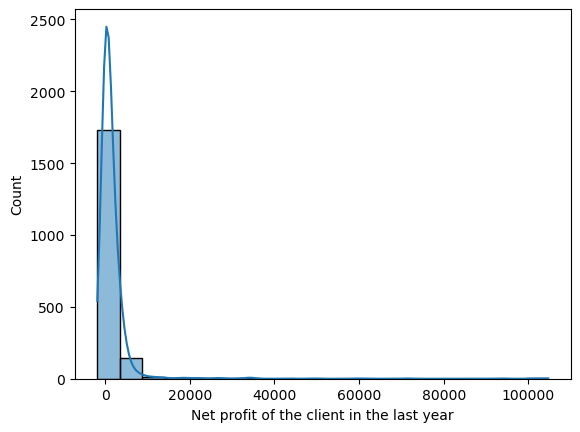

In [46]:
# Distribution of the net profit in the last year
sns.histplot(df['NET_MSC_LTM'], bins=20, kde=True)
plt.xlabel('Net profit of the client in the last year')
plt.show()

In [49]:
# Compute the frequency distribution of online and physical transactions to assess the prevalence of each type.
online_physical_distribution = df['ONLINEPOS_encoded'].value_counts()
print(online_physical_distribution)
# For our client, there are 1746 online transactions and 162 physical transactions.

1    1746
0     162
Name: ONLINEPOS_encoded, dtype: int64


In [51]:
# Analyze distribution of different card types used for transactions
card_scheme_distribution = df['SCHEME_coded'].value_counts() # 0 - MC, 1 - Other_CC, 2 - Visa
print(card_scheme_distribution)
# For our client, the most frequent type of card used is MasterCard (676), followed by Visa (634) and 598 use other types of cards.

0    676
2    634
1    598
Name: SCHEME_coded, dtype: int64


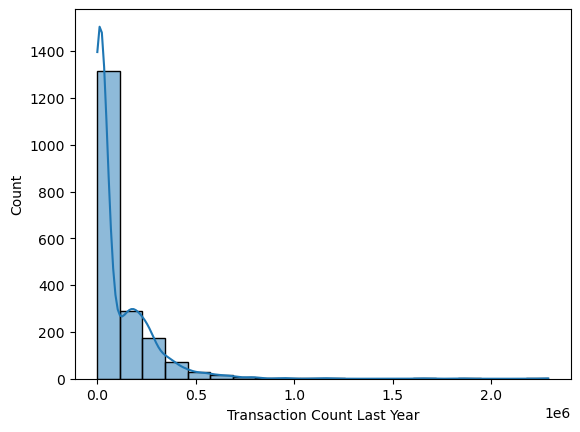

In [14]:
# Data Visualization
# Distribution of the transactions count in the last year
sns.histplot(df['TRX_COUNT_LTM'], bins=20, kde=True)
plt.xlabel('Transaction Count Last Year')
plt.show() # We can observe a downward trend of the transaction count in the last year

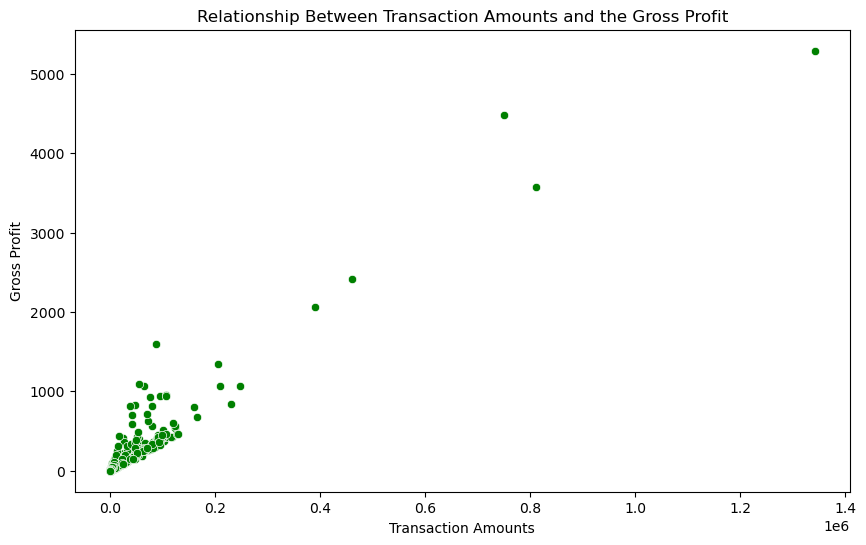

In [57]:
# Explore relationships between numerical variables using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TRX_AMOUNT', y='MSC', color='green')
plt.title('Relationship Between Transaction Amounts and the Gross Profit')
plt.xlabel('Transaction Amounts')
plt.ylabel('Gross Profit')
plt.show()


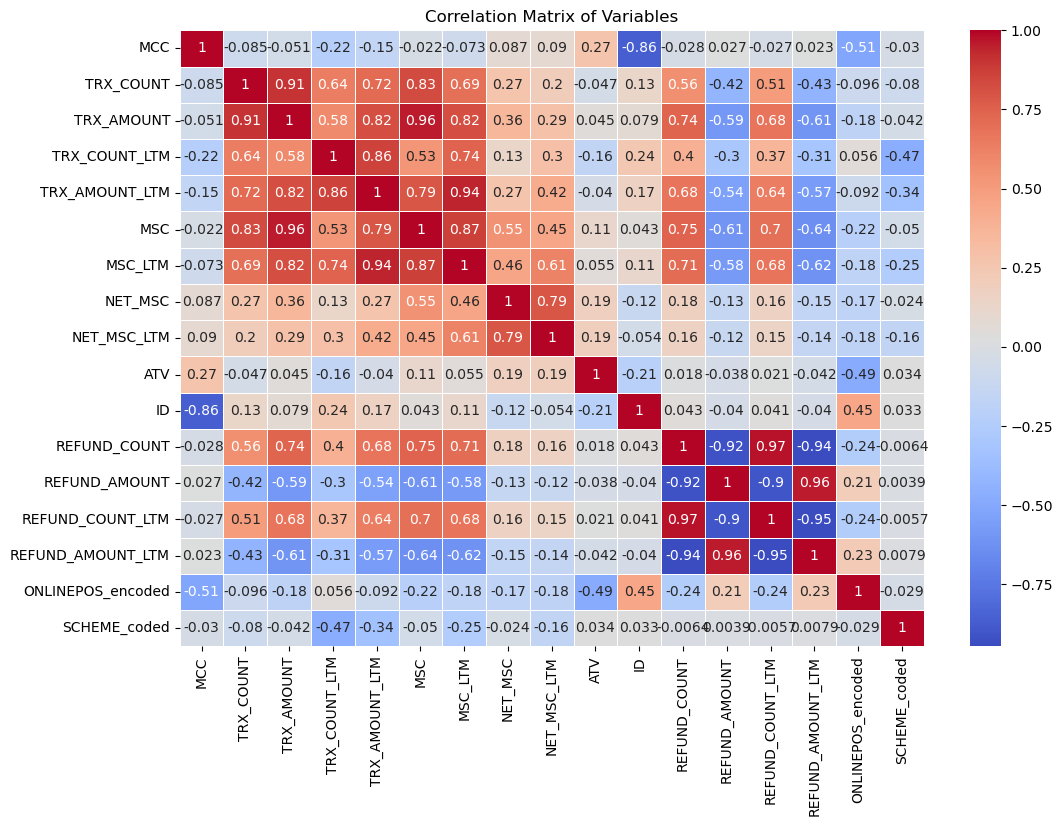

In [54]:
# Compute and visualize correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Variables')
plt.show()
# We can see that there is a positive and high correlation (0.96) between the gross profit (MSC) and the amount of the transactions (TRX_AMOUNT), also, between the gross profit of the last year
# and the amount of the transactions of the last year (0.94). This tells us that there is a direct and positive relationship between the gross profit and the value of the transactions.
# Also, there are some negative correlations between the value of the refunds and the number of the refunds, indicating that there is a indirect relationship between them.